In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

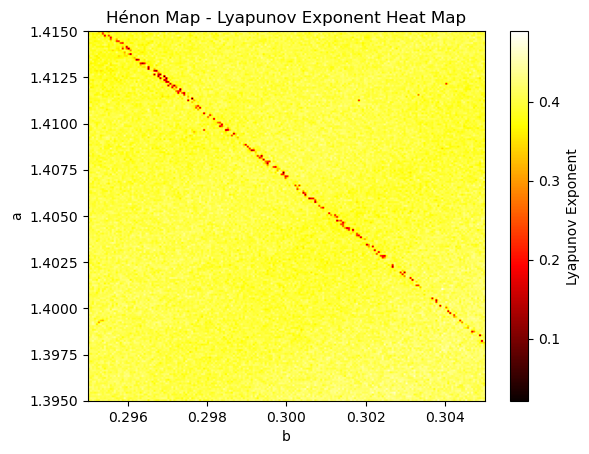

In [18]:
def lyapunov_exponent(a, b, num_iterations=1000, discard=100):
    
    '''
    a, b = intial parameters
    num_interations = total number of iterations
    discard = number of interations to skip over (affected by transient behavior)
    '''
    
    epsilon = 1e-10 #small constant to avpid ln(0)
    max_val = 1e10   #threshold to prevent overflow
    
    x, y = 0, 0  # Initial conditions
    sum_ln = 0
    for i in range(num_iterations):
        x_next = 1 - a * x ** 2 + y
        y_next = b * x
        
        # prevent overflow by limiting x and y
        if abs(x_next) > max_val or abs(y_next) > max_val:
            return np.nan  # Indicate an overflow condition
        
        if i >= discard:  # Skip transient
            df_x = -2 * a * x #derivative of x_next
            ln_df_x = np.log(abs(df_x + epsilon)) #natural lof of x_next
            sum_ln += ln_df_x #definition of lyapunov exponent
            
        x, y = x_next, y_next
        
    return sum_ln / (num_iterations - discard)

#range of a and b values to focus on
a_values = np.linspace(1.395, 1.415, 200)
b_values = np.linspace(0.295, 0.305, 200)
lyapunov_map = np.zeros((len(a_values), len(b_values)))


# Lists to store parameters for each type of behavior
chaotic = []
periodic = []
intermittent = []  # Potentially used for specific cases

# Generate values of Lyapunov exponent for different a, b
for i, a in enumerate(a_values):
    for j, b in enumerate(b_values):
        lyapunov_exp = lyapunov_exponent(a, b)
        lyapunov_map[i, j] = lyapunov_exp
        
        # Classify the behavior based on Lyapunov exponent
        if np.isnan(lyapunov_exp):
            continue  # Skip overflow cases
        elif lyapunov_exp > 0.35:
            chaotic.append((a, b))
        elif lyapunov_exp < -0.6:
            periodic.append((a, b))
        else:
            # Here we may classify as intermittent if needed
            intermittent.append((a, b))
            
# Print the classified ranges or values
#print(f"Chaotic regions (a, b): {chaotic}")
#print(f"Periodic regions (a, b): {periodic}")
#print(f"Intermittent regions (a, b): {intermittent}")

# Plotting the heat map
plt.imshow(lyapunov_map, extent=(0.295, 0.305, 1.395, 1.415), cmap='hot', aspect='auto')
plt.colorbar(label='Lyapunov Exponent')
plt.xlabel('b')
plt.ylabel('a')
plt.title('Hénon Map - Lyapunov Exponent Heat Map')
plt.show()

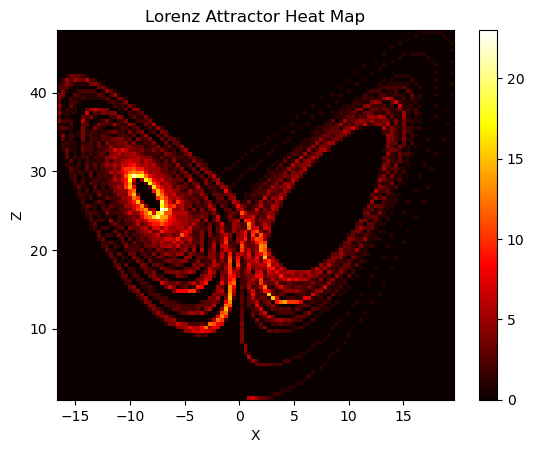

In [11]:
def lorenz(t, state, sigma = 10, beta = 8/3, rho = 28):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]


#initial conditions
initial_state = [1.0, 1.0, 1.0]
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

#solve system
solution = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval)
x, y, z = solution.y

#plot
plt.hist2d(x, z, bins=100, cmap='hot')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Lorenz Attractor Heat Map')
plt.show()